Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
df = pd.read_csv('../datasets/salary_data1.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


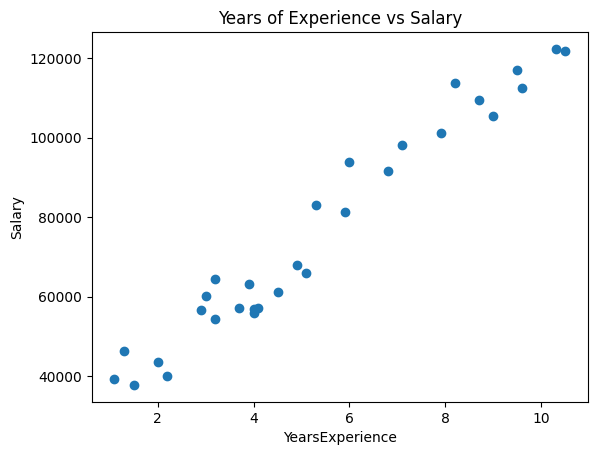

In [3]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.show()

In [4]:
## Divide the dataset into independent and dependent variables
X = df[['YearsExperience']] # Independent feature
y = df[['Salary']] # Dependent feature

In [5]:
X, y

(    YearsExperience
 0               1.1
 1               1.3
 2               1.5
 3               2.0
 4               2.2
 5               2.9
 6               3.0
 7               3.2
 8               3.2
 9               3.7
 10              3.9
 11              4.0
 12              4.0
 13              4.1
 14              4.5
 15              4.9
 16              5.1
 17              5.3
 18              5.9
 19              6.0
 20              6.8
 21              7.1
 22              7.9
 23              8.2
 24              8.7
 25              9.0
 26              9.5
 27              9.6
 28             10.3
 29             10.5,
       Salary
 0    39343.0
 1    46205.0
 2    37731.0
 3    43525.0
 4    39891.0
 5    56642.0
 6    60150.0
 7    54445.0
 8    64445.0
 9    57189.0
 10   63218.0
 11   55794.0
 12   56957.0
 13   57081.0
 14   61111.0
 15   67938.0
 16   66029.0
 17   83088.0
 18   81363.0
 19   93940.0
 20   91738.0
 21   98273.0
 22  101302.0
 23  113812.

In [42]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [43]:
X.shape

(30, 1)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24, 1), (6, 1), (24, 1), (6, 1))

In [45]:
## Standardize the dataset over independent train data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

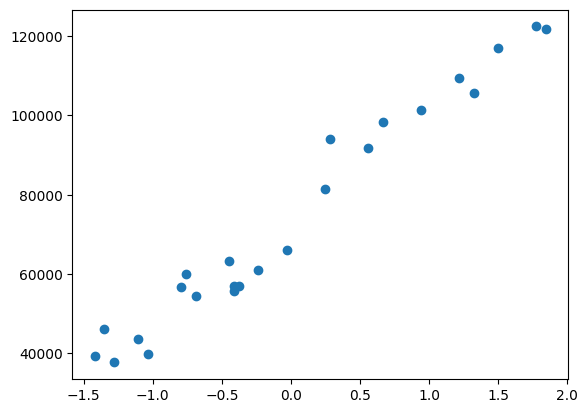

In [47]:
plt.scatter(X_train, y_train)

In [48]:
# Train the model Simple Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
print("The slope or coefficient of weight is: ", model.coef_)
print("The intercept of the line is: ", model.intercept_)

The slope or coefficient of weight is:  [[27151.53742583]]
The intercept of the line is:  [74207.625]


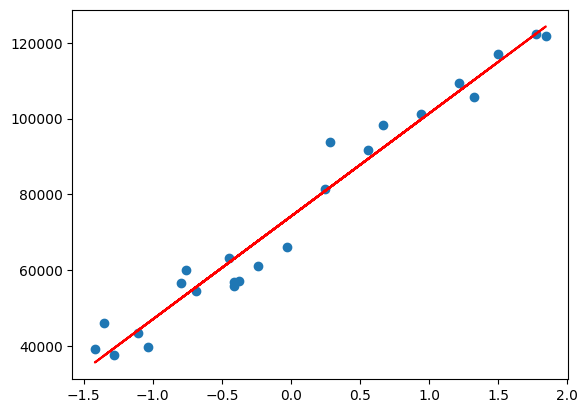

In [50]:
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), 'r')

In [51]:
y_pred_test = model.predict(X_test)

In [52]:
y_pred_test, y_test

(array([[115790.21011287],
        [ 71498.27809463],
        [102596.86866063],
        [ 75267.80422384],
        [ 55477.79204548],
        [ 60189.69970699]]),
       Salary
 27  112635.0
 15   67938.0
 23  113812.0
 17   83088.0
 8    64445.0
 9    57189.0)

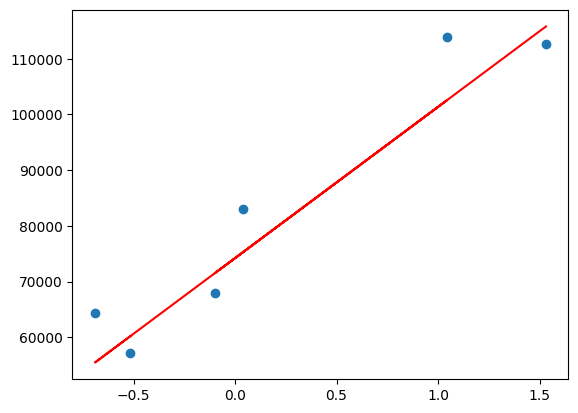

In [53]:
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test), 'r')
plt.show()

Performance Metrics

 MSE, RMSE, MAE
 
  R2 Score, Adjusted R2 Score

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [55]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  49830096.85590834
Mean Absolute Error:  6286.453830757746
Root Mean Squared Error:  7059.043621901506


In [56]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)
print("R2 Score: ", score * 100, '%')

R2 Score:  90.24461774180497 %


In [57]:
# Display Adjusted R2 Score
adjusted_r2 = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print("Adjusted R2 Score: ", adjusted_r2 * 100, '%')

Adjusted R2 Score:  87.80577217725623 %


In [58]:
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [64]:
## New data point years of experience is 15

scaled_weight = scaler.transform([[15]])
scaled_weight

array([[3.40574408]])

In [65]:
print('The salary of person with 15 years of experince is: ', model.predict(scaled_weight))

The salary of person with 15 years of experince is:  [[166678.81285724]]


Assumptions of Linear Regressionss

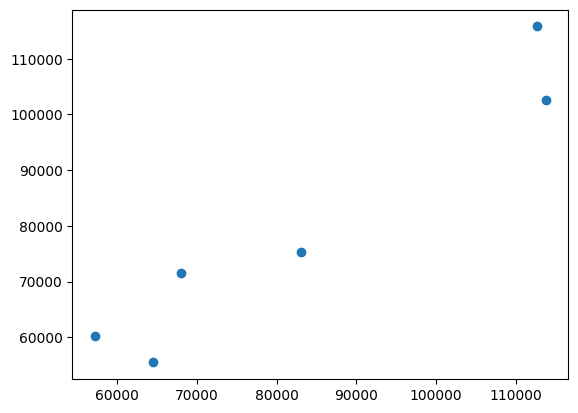

In [66]:
## Plot a scatter plot for the prediction
plt.scatter(y_test, y_pred_test)

In [67]:
# Residuals
residuals = y_test - y_pred_test
print(residuals)

          Salary
27  -3155.210113
15  -3560.278095
23  11215.131339
17   7820.195776
8    8967.207955
9   -3000.699707


<Axes: ylabel='Count'>

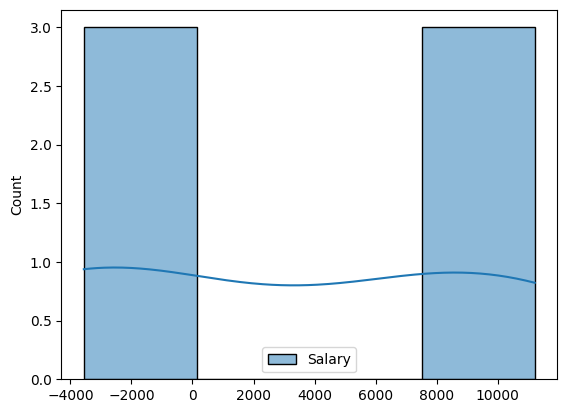

In [71]:
# Plot the residuals
import seaborn as sns
sns.histplot(residuals, kde = True)

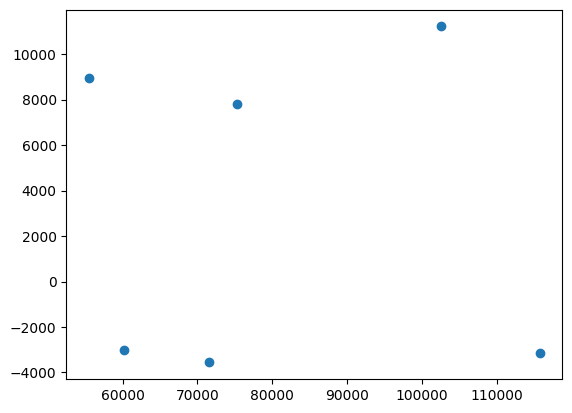

In [69]:
## Scatter plot with respect to prediction and residuals
# uniform distribution
plt.scatter(y_pred_test, residuals)